# Introduction to Quantitative Finance

Copyright (c) 2019 Python Charmers Pty Ltd, Australia, <https://pythoncharmers.com>. All rights reserved.

<img src="img/python_charmers_logo.png" width="300" alt="Python Charmers Logo">

Published under the Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) license. See `LICENSE.md` for details.

Sponsored by Tibra Global Services, <https://tibra.com>

<img src="img/tibra_logo.png" width="300" alt="Tibra Logo">


## Module 1.5: Bayesian inference

# 1.5.1 Bayesian Statistics Introduction

Classical / frequentist statistics interprets a probability as a limit of many identical trials. In the strict frequentist viewpoint, a statement such as "The probability that party X will win the election" is meaningless; the election will only take place once, under one set of circumstances, and will not be repeated -- so the outcome cannot be observed repeatedly and the probability of this cannot be computed. Likewise, the strict frequentist perspective is that it is meaningless to discuss probabilities associated with model parameters and other fixed but unknown quantities, such as whether it is raining right now (if you are holed up in a building). It is either raining or it is not.

In practice, it is useful to be able to reason quantitatively about events that cannot and will not be repeated, or about model parameters that are fixed but unobserved, or about quantities that are fixed (deterministic) but unknown. This requires either a frequentist methodology combined with inaccurate statistical reasoning (which is rife) or a Bayesian interpretation of probability.

In the Bayesian perspective, a probability encodes a degree of certainty about a proposition. It is "subjective": you and I may have different beliefs about a proposition. With the proposition "it is raining", if you heard yesterday's weather forecast, and I didn't, we may assign different probabilities the same proposition that it is raining right now.


# Introduction: We all think "Bayesian"

The Bayesian method requires that we be explicit about our uncertainty up-front and update our beliefs in the light of new evidence or data.

Features of Bayesian inference:
- Probability encodes our degree of certainty or uncertainty.
- Unknown parameters are modelled as probability distributions.


### Why use Bayesian inference?

1. Because it is correct. Bayes' theorem is a theorem. If you accept the axioms of probability theory, it is true. You can ignore it, but it won't go away.

2. Because it is useful for applications.
3. You can incorporate your existing knowledge into the model, known as a prior.

This last point is interesting. If you have some *a priori* knowledge of the event (either intuition or something more formal), you can set this as a prior in your model. This leads to faster training of your model (assuming your prior is somewhat accurate) and can lead to the discover of better models.
 

Applications of Bayesian inference include:

- prediction (e.g. outcome of an election, behaviour of asset prices, ...)
- classification (does a person with these symptoms have this disease?; OCR; speech recognition)
- scientific inference
- hypothesis testing (single and multiple)
- modelling
- uncertainty analysis
- physics: thermodynamics, crystallography, astronomy, ...
- biology and medicine: bioinformatics (sequencing), predicting drug targets
- ranking for information retrieval, spam detection, ... and other computer science applications


### How to do Bayesian inference?

1. Method 1: **mathematical analysis**. This is exact but requires heroic integration skills, which makes it hard to begin in the field. A more important drawback is that it tends to be intractable for complex models.

2. Method 2: **probabilistic programming**. Computing power is cheap! Using simulation allows models to be more complex.

### Probability as logic

Bayesian statistics was previously called the "method of inverse probability" -- reasoning backwards from what we observe about the world to make quantitative inferences. Here is how [Jaynes 2003] introduces its relationship to other forms of inference.

### Deductive reasoning

Deductive reason can be analyzed into repeated application of two syllogisms:

<hr>

<center>
If A is true, then B is true.

A is true.

Therefore, B is true.
</center>

and its inverse:

<center>
If B is false, then A is false.

B is false.

Therefore, A is false.
</center>

<hr>

Note that these are only valid for the true/false values above. For instance, this reasoning in **invalid**: "If A is true, then B is true -> A is false, therefore B is false".


### Intuitive reasoning

As [Jaynes 2003] notes, we would like to use this kind of reasoning all the time, but most of the time **we do not have the right kind of information**. We fall back on weaker syllogisms like:

<hr>

If A is true, then B is true.

B is true.

Therefore, A becomes more plausible.

<hr>



**Example: probability of rain**

A $\equiv$ it will start to rain by 10am at the latest.

B $\equiv$ the sky will become cloudy before 10am.

If you notice clouds at 9:45am, your common sense obeys the weak syllogism above. You are more likely to take an umbrella.

What is the logical connection?

rain $\implies$ clouds

Notice that the physical cause is in the opposite direction:

clouds $\implies$ rain

Important: the **logical connection** is what is most relevant to our inference.

### Weak syllogism 2

There are other weaker syllogisms that we use every day in our reasoning, such as:

<hr>

If A is true, then B becomes more plausible.

A is false.

Therefore, B becomes less plausible.

<hr>

**Example: disease symptoms**

Symptoms of the Zika virus include conjunctivitis (red eyes) and skin rash.

This traveller doesn't have conjunctivitis or skin rash. Therefore, it is less likely that he/she has the Zika virus.

### Weak syllogism 3

<hr>

If A is true, then B becomes more plausible.

B is true.

Therefore, A becomes more plausible.

<hr>

**Example:**

Aston-Martin owners are usually rich.

Bill Gates is rich.

Therefore, it is more likely that Bill Gates owns an Aston-Martin.

### Aside

There are many more complex weak syllogisms that we use easily and intuitively in everyday reasoning. Polya [1945, 1954] wrote three books about plausible reasoning, pointing out many interesting examples and showing that we do plausible reasoning by applying definite rules.

### Meaning for probability theory

These principles may be made **quantitative**, with useful applications.

How? With the Cox-Jaynes interpretation of probability theory and **Bayes theorem**.

[See Terenin and Draper, "Cox's Theorem and the Jaynesian Interpretation of Probability"]

### Bayes' theorem

- $X$ = prior information
- $H$ = hypothesis or model parameters
- $D$ = data

$$P(H | DX) = P(H | X) \frac{P(D | HX)}{P(D | X)}$$

The vertical bar means "conditional upon". Bayes' theorem follows simply from the definition of conditional probability: $P ( A | B ) = \frac{P (A \cap B)}{P(B)}$.

We call these things:

$$ \textrm{posterior} = \textrm{prior} \times \frac{\textrm{likelihood}}{\textrm{evidence}}$$

### Prior information

It is important to specify the **prior information** carefully before we have a well-posed problem. Then this equation tells us what probabilities we need to find in order to see what conclusions are justified by our evidence.

Often this is regarded as a nuisance. It is, however, an **opportunity** to improve models, especially when data is sparse.

### Data sparsity

Often, in the real world, data is small / sparse / noisy / expensive to collect.

See "N is never large", Andrew Gelman: http://andrewgelman.com/2005/07/31/n_is_never_larg/

As you have more data, the posterior drifts away from the prior, **provided the prior is uninformed / flat enough**.

In [9]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

### Bayesian updating


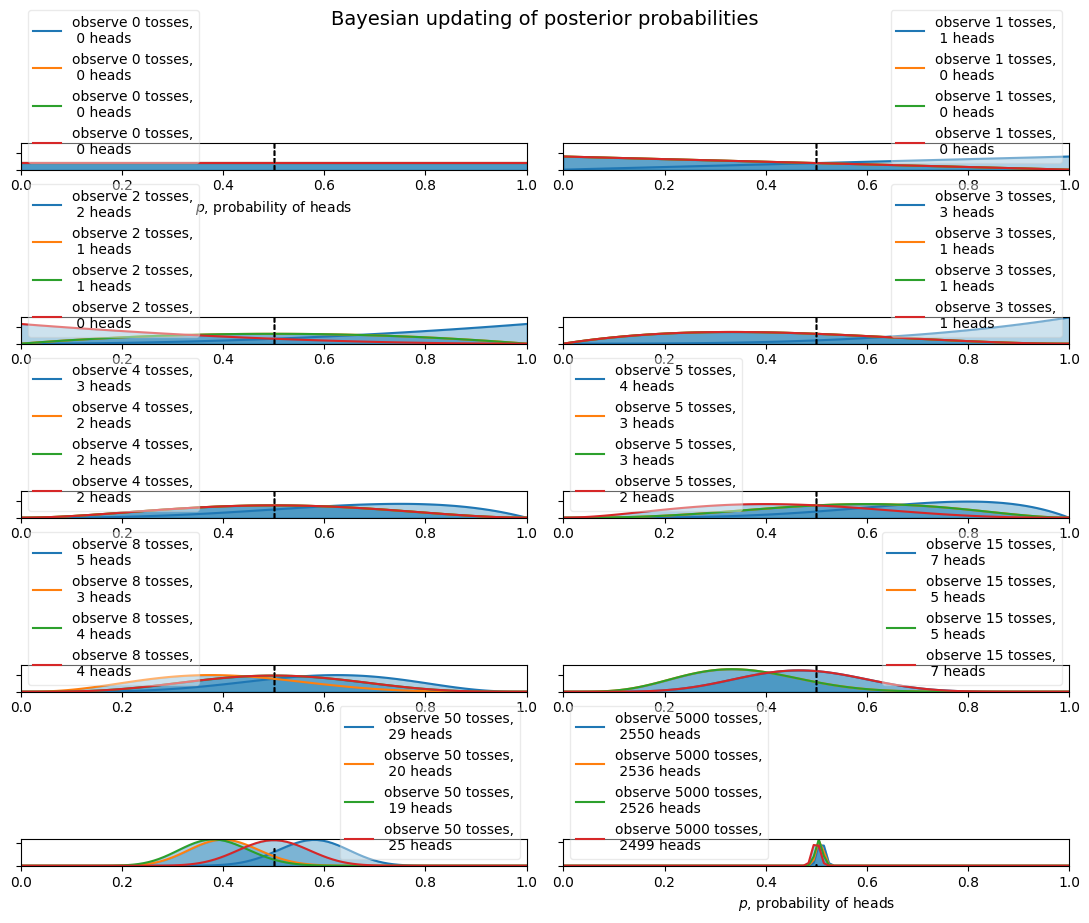

In [11]:
%run -i bayesian_updating_plot.py

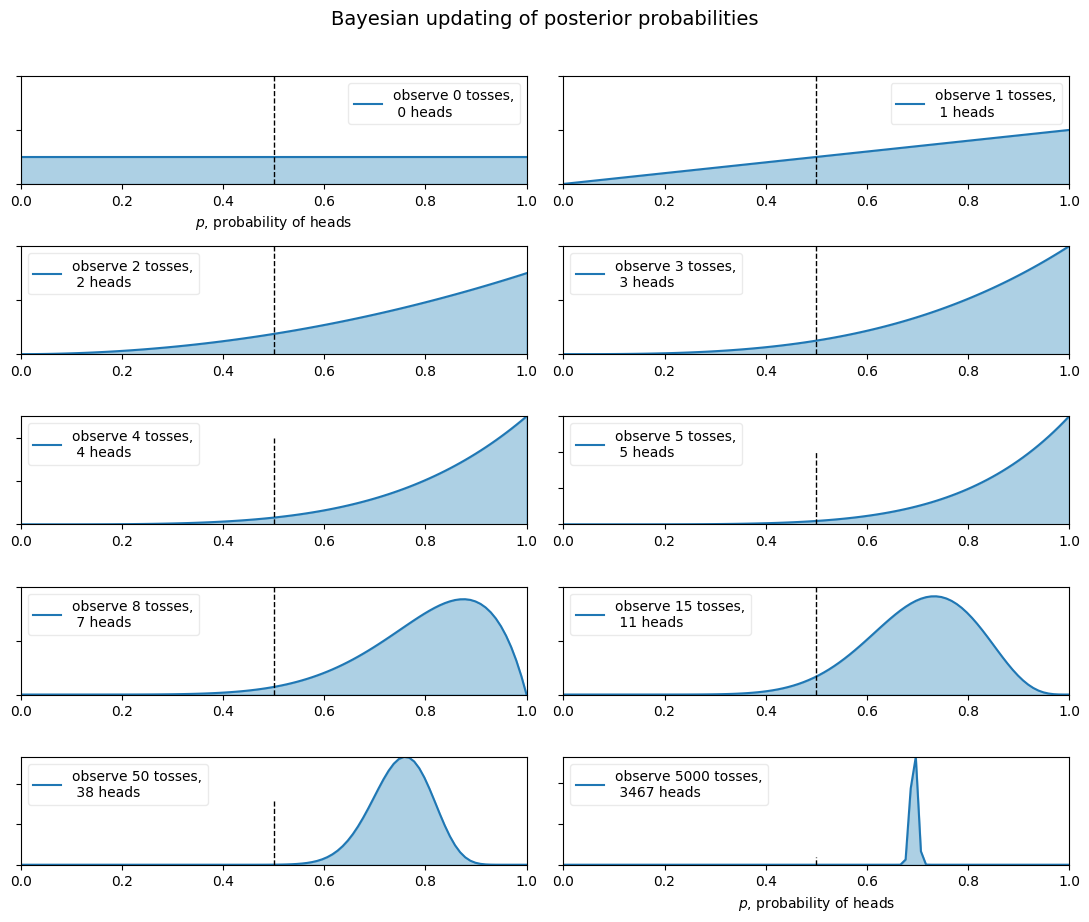

In [18]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 5000]
data = stats.bernoulli.rvs(0.7, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)//2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
         fontsize=14)

plt.tight_layout()
plt.show()

#### Exercises

Review the code for `bayesian_updating_plot.py` and make the following changes:

1. Run the analysis for 5000 trails for the last plot
2. Rerun the analysis with a biased coin (i.e. one with an 80% chance of heads). Observe how the Bayesian analysis probabilities change in the new plots.

*For solutions, see `solutions/bayesian_updating_2.py`*

### Outline of solving problems with Bayesian reasoning

Tim Salimans, the winner of the Kaggle contest "Observing Dark Words", used Bayesian inference to find the best locations for halos. His solution is presented well in "Bayesian Methods for Hackers", chapter 5.

Summary:

### Steps to doing Bayesian inference

1. Construct a prior distribution $p(H|X)$ for what you are predicting ($H$) -- i.e. formulate our expectations about the thing before looking at the data.

2. Construct a probabilistic model for the data given your hypothesis / parameters and prior information: $p(D | HX)$.

3. Use Bayes’ rule to calculate the posterior distribution $P(H|DX)$ of the hypothesis. In other words, use the data to determine a **probability distribution** over the unknowns.

4. Minimize the expected loss with respect to the posterior distribution over the predictions for
$h$: 

$$
\hat{h} = \mathrm{argmin}_\mathrm{prediction} \mathbb{E} [L(\mathrm{prediction}, h)]
$$

i.e. tune our predictions to be as good as possible for the given error metric.

This may be the maximum a-posteriori ("MAP") estimate or something else.

### Applications which benefit from strong prior information

- Learning when a self-driving car should brake from LIDAR data
- Learning the effectiveness of a medicine from clinical data
- Learning the elasticity of demand from economic data
- Learning the structure of a distant galaxy from telescopic data
- Learning whether to accept or reject a box of widgets from industrial QC control data

### Resources

### Books

- Edwin T. Jaynes: "Probability Theory: The Logic of Science". (Cambridge University Press). A masterpiece. Deep and very interesting. 

- Michael I Jordan's lecture notes (UC Berkeley): https://people.eecs.berkeley.edu/~jordan/courses.html

- Bayesian modeling and inference, Spring 2010
- Practical machine learning, Fall 2009

- D. S. Sivia with J Skilling: "Data analysis: A Bayesian tutorial"

- MacKay: Information Theory, Inference, and Learning Algorithms

- John Kruschke: Doing Bayesian Data Analysis. 2nd edition switches to JAGS and Stan (from BUGS). "The dog book" for the illustration of dogs on the cover.

- Andrew Gelman et al. Bayesian Data Analysis. CRC Press (3rd edition). The most influential and widely used Bayesian text by statisticians.

- "Probabilistic Programming and Bayesian Methods for Hackers": Pearson CMG. Useful because it serves as more accessible documentation to PyMC. (The official PyMC docs assume prior knowledge of Bayesian inference.)

PyMC3 examples for PPBMH are available on GitHub: https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers

### Software for Bayesian modelling

- Stan: http://mc-stan.org. Upcoming successor to BUGS / JAGS. Compiles models to C++. Uses Hamiltonian Monte Carlo for posterior sampling.

- PyMC3: http://pymc-devs.github.io/pymc3/

- Edward: http://edwardlib.org. Variational inference package for Python built on TensorFlow.